In [1]:
import pandas as pd
import numpy as np
from pydataset import data
from statsmodels.formula.api import ols
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
import sklearn.preprocessing
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import env, prepare, explore, wrangle, evaluate
warnings.filterwarnings('ignore')

# Evaluation Exercise
>Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.

#### 1. Load the tips dataset from either pydataset or seaborn.

In [2]:
tips_df = sns.load_dataset('tips')

In [3]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips_df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


<AxesSubplot:>

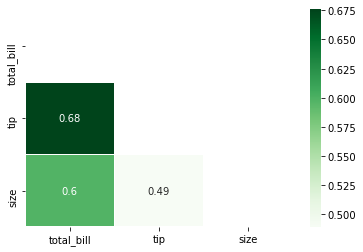

In [6]:
explore.heat_corr(tips_df)

#### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [7]:
model = ols('tip ~ total_bill', data=tips_df).fit()
tips_df['yhat'] = model.predict(tips_df.total_bill)

In [8]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,yhat
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807


#### 3. Plot the residuals for the linear regression model that you made.

In [9]:
tips_df['yhat_baseline'] = tips_df['tip'].mean()

In [10]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279


In [11]:
tips_df['res'] = tips_df['yhat'] - tips_df['tip']

In [12]:
tips_df['base_res'] = tips_df['yhat_baseline'] - tips_df['tip']

In [13]:
tips_df

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,res,base_res
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,1.694636,1.988279
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,0.346223,1.338279
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,-0.373165,-0.501721
3,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,0.097250,-0.311721
4,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,-0.107178,-0.611721
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,3.969131,2.998279,-1.950869,-2.921721
240,27.18,2.00,Female,Yes,Sat,Dinner,2,3.774836,2.998279,1.774836,0.998279
241,22.67,2.00,Male,Yes,Sat,Dinner,2,3.301175,2.998279,1.301175,0.998279
242,17.82,1.75,Male,No,Sat,Dinner,2,2.791807,2.998279,1.041807,1.248279


Text(0.5, 1.0, 'Actual vs Baseline Residual')

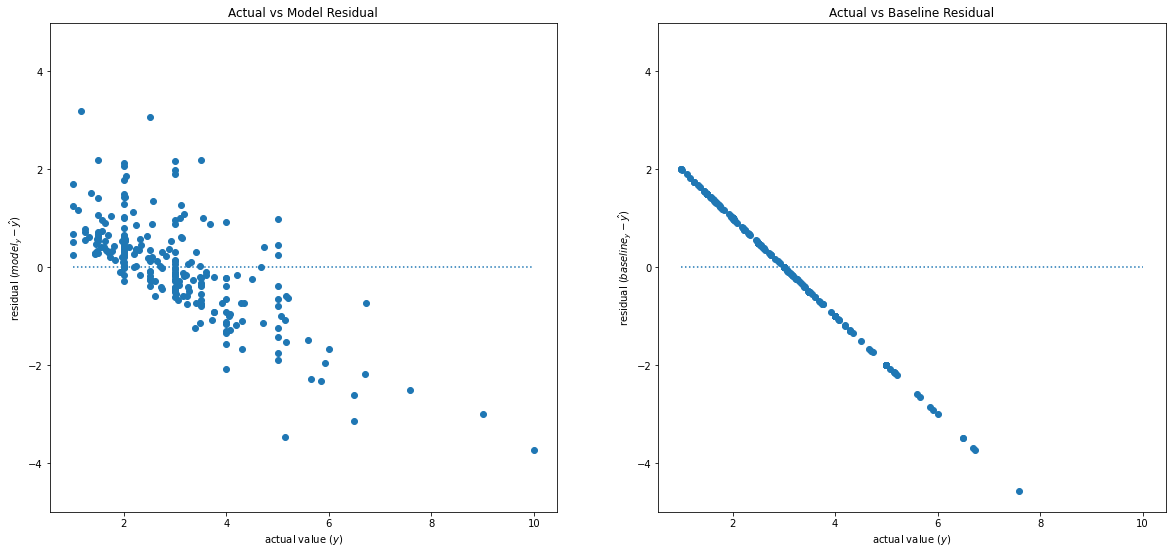

In [14]:
plt.figure(figsize=(20,9))
plt.subplot(121)
plt.hlines(0, tips_df.tip.min(), tips_df.tip.max(), ls=':')
plt.scatter(tips_df.tip, tips_df.res)
plt.ylim(-5,5)
plt.ylabel('residual ($model_y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Model Residual')
plt.subplot(122)
plt.hlines(0, tips_df.tip.min(), tips_df.tip.max(), ls=':')
plt.scatter(tips_df.tip, tips_df.base_res)
plt.ylim(-5,5)
plt.ylabel('residual ($baseline_y - \hat{y}$)')
plt.xlabel('actual value ($y$)')
plt.title('Actual vs Baseline Residual')

In [15]:
def plot_res(actual, baseline, predicted):
    res = predicted - actual
    base_res = baseline - actual
    plt.figure(figsize=(20,9))
    plt.subplot(121)
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, res)
    plt.ylim(-5,5)
    plt.ylabel('residual ($model_y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Model Residual')
    plt.subplot(122)
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, base_res)
    plt.ylim(-5,5)
    plt.ylabel('residual ($baseline_y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Baseline Residual')
    return plt.gca()

<AxesSubplot:title={'center':'Actual vs Baseline Residual'}, xlabel='actual value ($y$)', ylabel='residual ($baseline_y - \\hat{y}$)'>

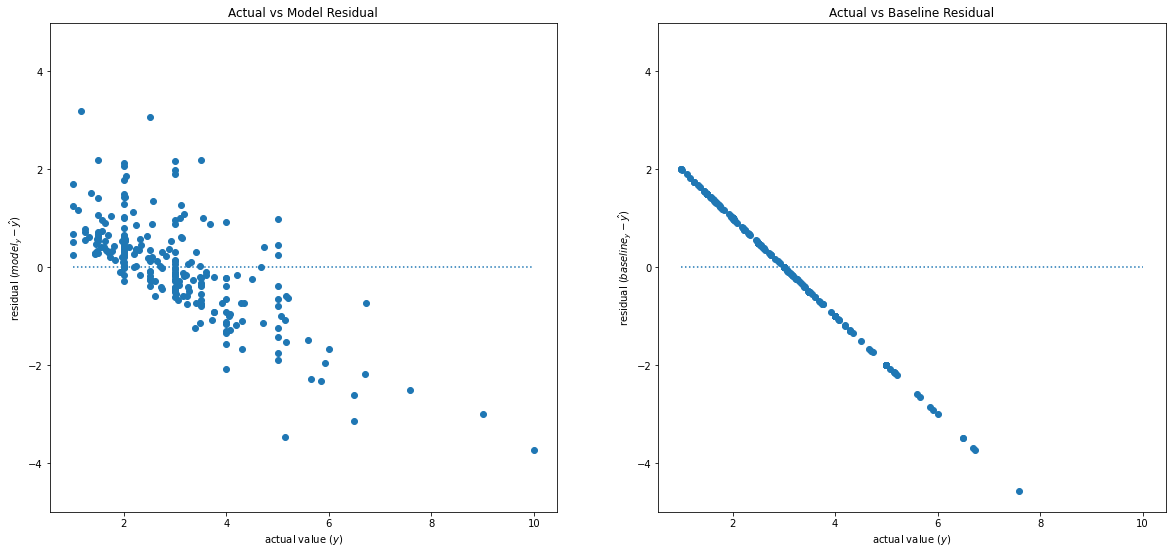

In [16]:
plot_res(tips_df.tip, tips_df.yhat_baseline, tips_df.yhat)

#### 4/5. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model and for baseline

In [17]:
# SSE
sse_res = sum(tips_df.res ** 2)
sse_base = sum(tips_df.base_res ** 2)
sse_res

252.78874385077603

In [18]:
# MSE 
mse_res = sse_res / len(tips_df)
mse_base = sse_base / len(tips_df)

In [19]:
# RMSE
rmse_res = sqrt(mse_res)
rmse_base = sqrt(mse_base)

In [20]:
# ESS
ess_res = sum((tips_df.yhat - tips_df.tip.mean()) ** 2)
ess_base = sum((tips_df.yhat_baseline - tips_df.tip.mean()) ** 2)

In [21]:
# SSE
tss_res = sse_res + ess_res
tss_base = sse_base + ess_base

#### 7. What is the amount of variance explained in your model?

In [22]:
#r2
r2 = ess_res/tss_res
print('R-squared = ',round(r2,3))

R-squared =  0.457


- .457

#### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [23]:
sse_res > sse_base

False

In [24]:
eval_df = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
base_df = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
eval_df['model_error'] = np.array([sse_res, mse_res, rmse_res])
eval_df['base_error'] = np.array([sse_base, mse_base, rmse_base])
eval_df['model_efficacy'] = eval_df['model_error'] < eval_df['base_error']

In [25]:
eval_df

,metric,model_error,base_error,model_efficacy
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


#### 8. is it better than baseline? 

> yes it is!

#### 9. create evaluate module with all steps as functions

In [26]:
print(f'r\N{SUPERSCRIPT TWO} = {r2:.2}')

r² = 0.46


<AxesSubplot:title={'center':'Actual vs Baseline Residual'}, xlabel='actual value ($y$)', ylabel='residual ($baseline_y - \\hat{y}$)'>

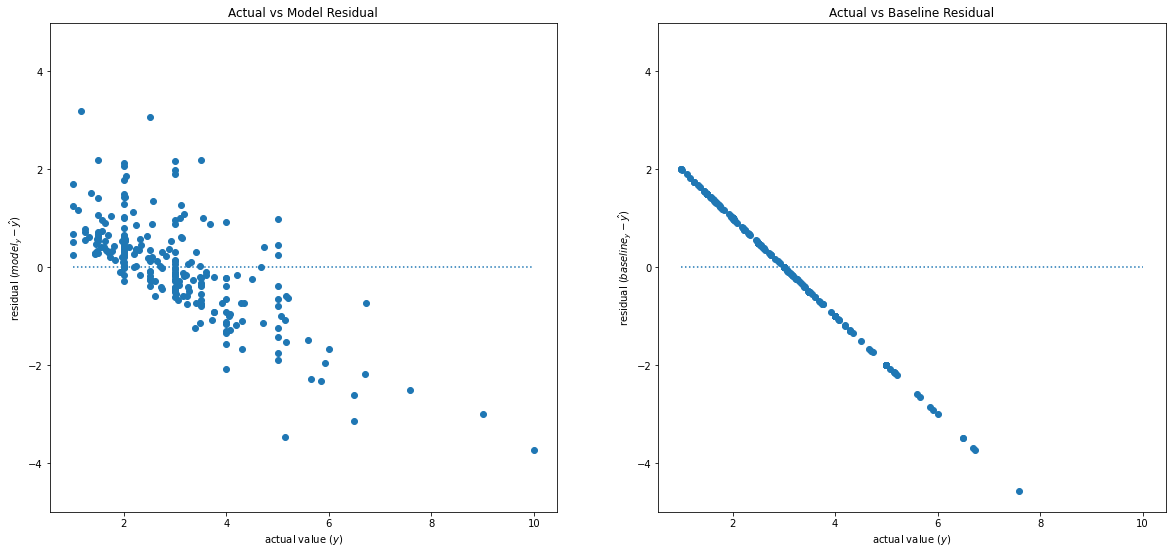

In [27]:
evaluate.plot_res(tips_df.tip, tips_df.yhat_baseline, tips_df.yhat)

In [28]:
slope, intercept, r, p, se = stats.linregress(tips_df.total_bill, tips_df.tip)

In [29]:
def regression_errors(actual, predicted):
    sse_res = sum((actual - predicted)  ** 2)
    ess_res = sum((predicted - actual.mean()) ** 2)
    tss_res = sse_res + ess_res
    mse_res = sse_res / len(actual)
    rmse_res = mse_res ** (1/2)
    return (print(f'|Sum of Squared Errors: {sse_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Explained Sum of Squares: {ess_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Total Sum of Squares : {tss_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Mean Squared Error : {mse_res:.4}'),
            print('|-----------------------------------'),
            print(f'|Root Mean Squared Error : {rmse_res:.4}'))

In [30]:
regression_errors(tips_df.tip, tips_df.yhat) 

|Sum of Squared Errors: 252.8
|-----------------------------------
|Explained Sum of Squares: 212.4
|-----------------------------------
|Total Sum of Squares : 465.2
|-----------------------------------
|Mean Squared Error : 1.036
|-----------------------------------
|Root Mean Squared Error : 1.018


(None, None, None, None, None, None, None, None, None)

In [31]:
actual = tips_df.tip
predicted = tips_df.yhat
sse_res = sum((predicted-actual)  ** 2)
sse_res

252.78874385077603

In [32]:
ess_res = sum((predicted - actual.mean()) ** 2)
ess_res

212.42373319840414

In [33]:
len(actual)

244

In [34]:
len(tips_df)

244

In [35]:
def baseline_mean_erros(actual):
    baseline = actual.mean()
    sse_base = sum((actual - baseline)  ** 2)
    mse_base = sse_base / len(actual)
    rmse_base = mse_base ** (1/2)
    return (print(f'|Sum of Squared Errors: {sse_base:.4}'),
            print('|-----------------------------------'),
            print(f'|Mean Squared Error : {mse_base:.4}'),
            print('|-----------------------------------'),
            print(f'|Root Mean Squared Error : {rmse_base:.4}'))

In [36]:
baseline_mean_erros(tips_df.tip)

|Sum of Squared Errors: 465.2
|-----------------------------------
|Mean Squared Error : 1.907
|-----------------------------------
|Root Mean Squared Error : 1.381


(None, None, None, None, None)

In [37]:
def better_than_baseline(actual, predicted):
    sse_res = sum((actual - predicted)  ** 2)
    ess_res = sum((predicted - actual.mean()) ** 2)
    tss_res = sse_res + ess_res
    mse_res = sse_res / len(actual)
    rmse_res = mse_res ** (1/2)
    baseline = actual.mean()
    sse_base = sum((actual - baseline)  ** 2)
    mse_base = sse_base / len(actual)
    rmse_base = mse_base ** (1/2)
    eval_df = pd.DataFrame(np.array(['SSE','MSE','RMSE']), columns=['metric'])
    base_df = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
    eval_df['model_error'] = np.array([sse_res, mse_res, rmse_res])
    eval_df['base_error'] = np.array([sse_base, mse_base, rmse_base])
    eval_df['model_efficacy'] = eval_df['model_error'] < eval_df['base_error']
    return eval_df

In [38]:
better_than_baseline(tips_df.tip, tips_df.yhat)

,metric,model_error,base_error,model_efficacy
0,SSE,252.788744,465.212477,True
1,MSE,1.036019,1.906609,True
2,RMSE,1.017850,1.380800,True


In [39]:
def regression_stats(x, y):
    slope, intercept, r, p, se = stats.linregress(x, y)
    return(print(f'|Slope of Regression: {slope:.4}'),
            print('|-----------------------------------'),
            print(f'|Regression intercept: {intercept:.4}'),
            print('|-----------------------------------'),
            print(f'|r\N{SUPERSCRIPT TWO} = {r2:.2}'),
            print('|-----------------------------------'),
            print(f'|p value = {p:.4}'),
            print('|-----------------------------------'),
            print(f'|Standard error : {se:.4}'))

In [40]:
regression_stats(tips_df.tip, tips_df.yhat)

|Slope of Regression: 0.4566
|-----------------------------------
|Regression intercept: 1.629
|-----------------------------------
|r² = 0.46
|-----------------------------------
|p value = 6.692e-34
|-----------------------------------
|Standard error : 0.03202


(None, None, None, None, None, None, None, None, None)

#### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [41]:
data

<function pydataset.data(item=None, show_doc=False)>

In [42]:
mpg_df = data('mpg')

In [43]:
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
displ,234.0,3.471795,1.291959,1.6,2.4,3.3,4.6,7.0
year,234.0,2003.500000,4.509646,1999.0,1999.0,2003.5,2008.0,2008.0
cyl,234.0,5.888889,1.611534,4.0,4.0,6.0,8.0,8.0
cty,234.0,16.858974,4.255946,9.0,14.0,17.0,19.0,35.0
hwy,234.0,23.440171,5.954643,12.0,18.0,24.0,27.0,44.0


In [44]:
mpg_df = mpg_df[['displ','hwy']].reset_index()

In [45]:
mpg_scaled = prepare.minmax_scale(mpg_df)

In [46]:
evaluate.regression_stats(mpg_scaled['displ'],mpg_scaled['hwy'])

|Slope of Regression: -0.5958
|-----------------------------------
|Regression intercept: 0.564
|-----------------------------------
|r² = 0.59
|-----------------------------------
|p value = 2.039e-46
|-----------------------------------
|Standard error : 0.03282


(None, None, None, None, None, None, None, None, None)

In [47]:
model = ols('hwy ~ displ', data=mpg_scaled).fit()
mpg_scaled['yhat'] = model.predict(mpg_scaled.displ)

In [48]:
mpg_scaled['yhat_baseline'] = mpg_scaled['hwy'].mean()

<AxesSubplot:title={'center':'Actual vs Baseline Residual'}, xlabel='actual value ($y$)', ylabel='residual ($baseline_y - \\hat{y}$)'>

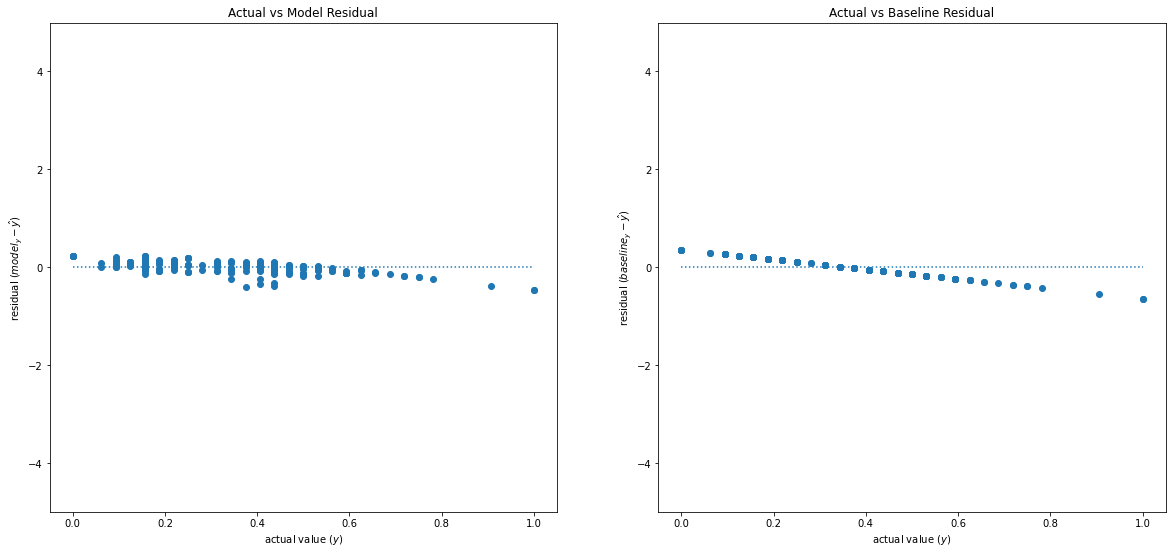

In [49]:
evaluate.plot_res(mpg_scaled['hwy'], mpg_scaled['yhat_baseline'], mpg_scaled['yhat'])

In [50]:
evaluate.regression_errors(mpg_scaled['hwy'], mpg_scaled['yhat'])

|Sum of Squared Errors: 3.334
|-----------------------------------
|Explained Sum of Squares: 4.734
|-----------------------------------
|Total Sum of Squares : 8.068
|-----------------------------------
|Mean Squared Error : 0.01425
|-----------------------------------
|Root Mean Squared Error : 0.1194


(None, None, None, None, None, None, None, None, None)

In [51]:
evaluate.baseline_mean_errors(mpg_scaled['hwy'])

|Sum of Squared Errors: 8.068
|-----------------------------------
|Mean Squared Error : 0.03448
|-----------------------------------
|Root Mean Squared Error : 0.1857


(None, None, None, None, None)

In [52]:
evaluate.better_than_baseline(mpg_scaled['hwy'],mpg_scaled['yhat'])

,metric,model_error,base_error,model_efficacy
0,SSE,3.333817,8.068030,True
1,MSE,0.014247,0.034479,True
2,RMSE,0.119361,0.185685,True


In [53]:
mpg_scaled = mpg_scaled[mpg_scaled.columns.drop('index')]
mpg_scaled

,displ,hwy,yhat,yhat_baseline
0,0.037037,0.53125,0.541956,0.357505
1,0.037037,0.53125,0.541956,0.357505
2,0.074074,0.59375,0.519890,0.357505
3,0.074074,0.56250,0.519890,0.357505
4,0.222222,0.43750,0.431625,0.357505
...,...,...,...,...
229,0.074074,0.50000,0.519890,0.357505
230,0.074074,0.53125,0.519890,0.357505
231,0.222222,0.43750,0.431625,0.357505
232,0.222222,0.43750,0.431625,0.357505


In [54]:
scaler = sklearn.preprocessing.MinMaxScaler()
scaler.fit(mpg_df[['displ','hwy']])

MinMaxScaler()

In [55]:
unscaled = scaler.inverse_transform(mpg_scaled[['hwy','yhat']])
unscaled = pd.DataFrame(unscaled)
unscaled

,0,1
0,4.46875,29.342591
1,4.46875,29.342591
2,4.80625,28.636473
3,4.63750,28.636473
4,3.96250,25.812002
...,...,...
229,4.30000,28.636473
230,4.46875,28.636473
231,3.96250,25.812002
232,3.96250,25.812002


In [56]:
mpg_df = mpg_df[mpg_df.columns.drop('index')]

In [57]:
mpg_df['pred_hwy'] = unscaled[1]

In [58]:
mpg_df['pred_hwy'] = mpg_df['pred_hwy'].round()

In [59]:
mpg_df['residual'] = mpg_df['pred_hwy'] - mpg_df['hwy']

In [60]:
mpg_df

,displ,hwy,pred_hwy,residual
0,1.8,29,29.0,0.0
1,1.8,29,29.0,0.0
2,2.0,31,29.0,-2.0
3,2.0,30,29.0,-1.0
4,2.8,26,26.0,0.0
...,...,...,...,...
229,2.0,28,29.0,1.0
230,2.0,29,29.0,0.0
231,2.8,26,26.0,0.0
232,2.8,26,26.0,0.0


In [61]:
mpg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
displ,234.0,3.471795,1.291959,1.6,2.4,3.3,4.6,7.0
hwy,234.0,23.440171,5.954643,12.0,18.0,24.0,27.0,44.0
pred_hwy,234.0,23.474359,4.549370,11.0,19.0,24.0,27.0,30.0
residual,234.0,0.034188,3.856730,-15.0,-2.0,0.0,2.0,7.0
